## Clase 11 Aprendizaje Supervisado  - Evaluación de modelos

https://www.kaggle.com/c/petfinder-adoption-prediction/data


**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)

Age - Age of pet when listed, in months

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Fee - Adoption fee (0 = Free)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import  train_test_split

### Ejercicio 1

In [2]:
# 1) Cargar el dataset "train"
data = pd.read_csv('train.csv')

In [3]:
# 2) Trabajar solo con las features "'Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'"
df_train = data.filter(items=['Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'])

In [4]:
# 3) Formatear **Age**, **Fee** y **AdoptionSpeed**  como numéricas y el resto como categóricas (pd.Categorical)
#df_train['Type'] = pd.Categorical(df_train['Type'])
#df_train['Breed1'] = pd.Categorical(df_train['Breed1'])
#df_train['Breed2'] = pd.Categorical(df_train['Breed2'])
#df_train['Gender'] = pd.Categorical(df_train['Gender'])
#df_train['Health'] = pd.Categorical(df_train['Health'])

### Ejercicio 2
1) Crear una feature nueva para cuando un animal tenga dos **Breeds**. (np.where) 

2) Utilizar one hot encoding para las variables **Gender** y **Health** (pd.get_dummies) y eliminar las variables originales.

3) Elegir un citerio para cuantizar las variables **Age** y **Fee**.

4) Separar la columna **AdoptionSpeed** en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)

5) Utilizar ambos dataset para ajustar una regresión lineal y comparar resultados. A mayor score, mejor el ajuste.

In [5]:
# 1) Crear una feature nueva para cuando un animal tenga dos **Breeds**. (np.where) 
df_train['breed_new'] = np.where(df_train['Breed2']>0,1,0)
# I also eliminate old columns
del df_train['Breed1']
del df_train['Breed2']

In [6]:
# 2) Utilizar one hot encoding para las variables Gender y Health (pd.get_dummies) y eliminar las variables originales.
df_train = pd.get_dummies(df_train,columns=['Gender','Health'])

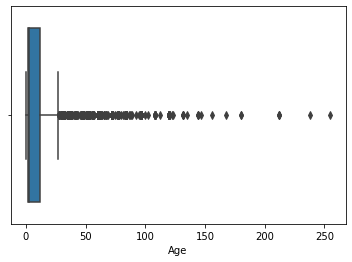

In [7]:
# 3) Elegir un citerio para cuantizar las variables **Age** y **Fee**.
sns.boxplot(df_train['Age']) # ver el gráfico para entender el comportamiento de Age

In [8]:
df_train['Age'].describe() # Ver los valores

count    10582.000000
mean        10.520412
std         18.374027
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [9]:
p25 = np.percentile(df_train.Age, 25)
p75 = np.percentile(df_train.Age, 75)
iqr = p75 - p25 # este es el rango intercuartilico
mini = p25 - (iqr*1.5) # definir el minimo utilizando una metodologia de multiplicar por 1.5
maxi = p75 + (iqr*1.5) # definir el maximo
df_train = df_train[(df_train.Age >= mini) & (df_train.Age <= maxi)]

In [10]:
q_cuts = pd.qcut(df_train['Age'], 4, labels=False) # Dividir en 4 bins
df_train['Age'] = q_cuts # update dataset

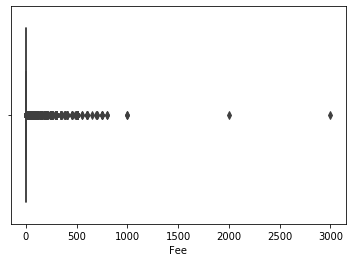

In [11]:
sns.boxplot(df_train['Fee']) # ver el gráfico para entender el comportamiento de Fee

In [12]:
df_train['Fee'].describe() # Ver los valores

count    9524.000000
mean       18.564049
std        75.627542
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3000.000000
Name: Fee, dtype: float64

In [13]:
# df_train['Fee'] = np.where(df_train['Fee'] == 0, 0,1) # Si hay costo = 0 si no = 1
fees = df_train['Fee']
fees_scaled = (fees - fees.min(axis=0)) / (fees.max(axis=0) - fees.min(axis=0))
df_train['Fee'] = fees_scaled

In [14]:
# 4.Separar la columna AdoptionSpeed en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)
X, y = df_train.drop(['AdoptionSpeed'], axis=1), df_train.AdoptionSpeed 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
#Baseline: 0.038
modelo_lr = LinearRegression().fit(X, y)
modelo_lr.score(X,y)

0.0834163213455299

### Ejercicio 3 : Evaluación de Modelos - Clase 11
Del ejercicio trabajado la clase pasada obtuvimos un conjunto de datos `X`  y un conjunto de datos `y` (target variable).

1) Separar los datos  en train y test según su criterio utilizando scikit-learn. Consultar documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [59]:
# división entre entrenamiento y evaluación
X, y = df_train.drop('AdoptionSpeed', axis=1), df_train.AdoptionSpeed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=3)

2) Realizar el entrenamiento sobre el conjunto de `Train` utilizando modelo lineal SGD y variar los parámetros de `Loss` y `Penalty` hasta obtener el mejor resultado. Validar el resultado con la métrica **Score** que provee el modelo.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.fit

In [60]:
model_sgd = SGDClassifier(loss='hinge', penalty='none' , random_state=242) #probar combinación de parámetros
model_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=242, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

3) Computar el **Score** (mean accuracy) obtenido sobre el entrenamiento anterior:
 
 El **baseline score** sobre `train` está alrededor de 22% (0.22)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.score

In [61]:
model_sgd.score(X_train, y_train)

0.3430505664548218

4) Realizar la predicción sobre el el set de `test` y analizar el % de accuracy.

El **baseline score** sobre `test` está alrededor de 24% (0.24)

In [62]:
y_true, y_pred = y_test, model_sgd.predict(X_test)
print(accuracy_score(y_true, y_pred) * 100,"%")

35.039370078740156 %


5) Analizar la matriz de confusión y analizar resultados.¿Qué harías para mejorar el accuracy de las clases mal predichas?

In [63]:
confusion_matrix(y_true, y_pred)

array([[  0,   0,  28,   0,  34],
       [  2,   0, 282,   0, 169],
       [  3,   0, 331,   0, 296],
       [  4,   0, 220,   0, 288],
       [  0,   0, 159,   0, 470]])

Ejecuar este código para poder generar la matriz en forma gráfica!!!

In [64]:
#conda install -c anaconda more-itertools
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

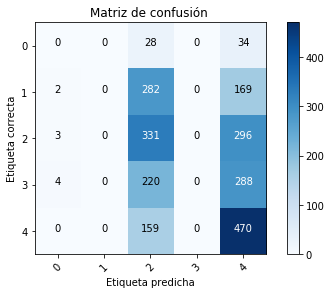

In [65]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['0','1','2','3','4'], title="Matriz de confusión ")